### 1. IMPORT LIBRARIES

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list


### 2. LOAD DATA

In [13]:
df = pd.read_csv("Sales Dataset.csv")

# Ambil fitur numerik saja untuk pembandingan
num_features = ["Amount", "Profit", "Quantity"]

scaler = RobustScaler()
X_num = scaler.fit_transform(df[num_features])


### 3. HIERARCHICAL CLUSTERING (AGGLOMERATIVE)

In [14]:
hier = AgglomerativeClustering(n_clusters=3)
hier_labels = hier.fit_predict(X_num)

# Silhouette score hierarchical
sil_hier = silhouette_score(X_num, hier_labels)
print("Silhouette Score - Hierarchical (k=3):", sil_hier)


Silhouette Score - Hierarchical (k=3): 0.2997322723702026


### 4. DENDROGRAM (WARD LINKAGE)

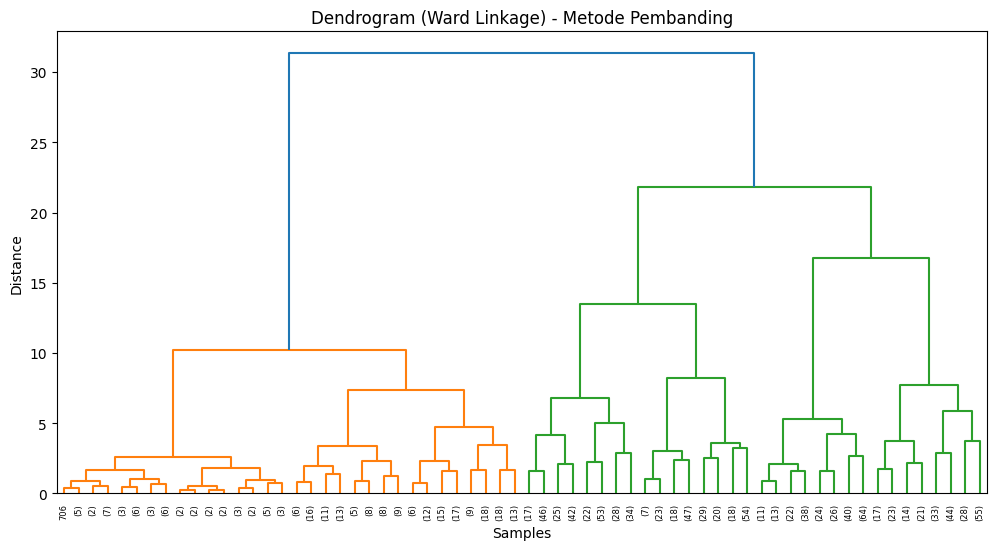

In [15]:
Z = linkage(X_num, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode="level", p=5)
plt.title("Dendrogram (Ward Linkage) - Metode Pembanding")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()


### 5. CLUSTERMAP-STYLE HEATMAP (WITHOUT SEABORN)

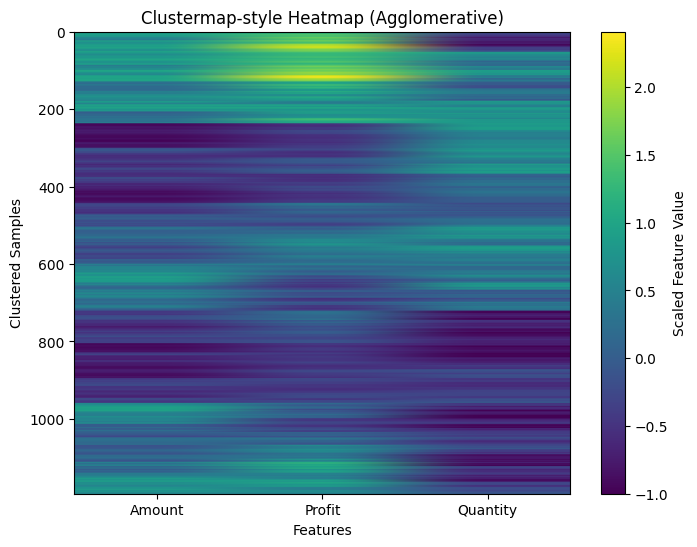

In [16]:
order = leaves_list(Z)
X_reordered = X_num[order]

plt.figure(figsize=(8, 6))
plt.imshow(X_reordered, aspect='auto', cmap='viridis')
plt.colorbar(label="Scaled Feature Value")
plt.title("Clustermap-style Heatmap (Agglomerative)")
plt.xlabel("Features")
plt.ylabel("Clustered Samples")
plt.xticks([0,1,2], num_features)
plt.show()


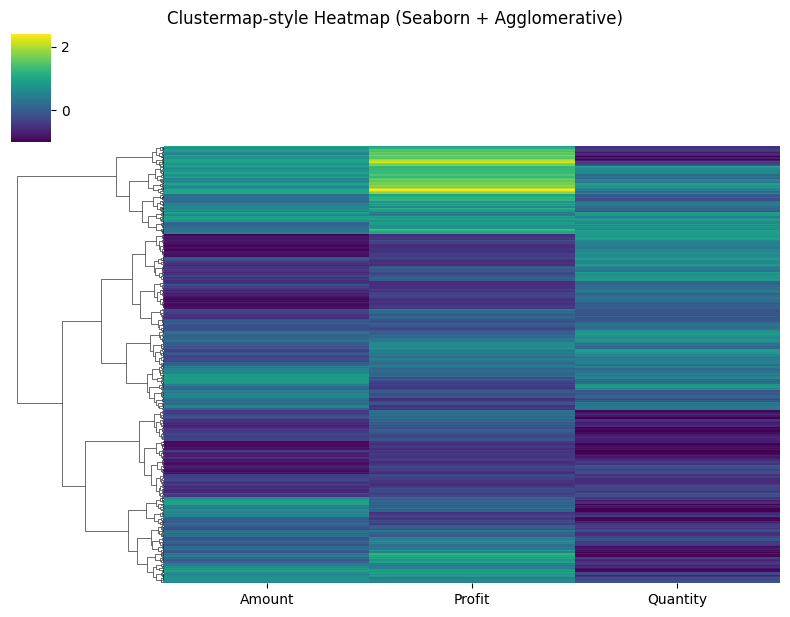

In [20]:
sns.clustermap(
    X_num,
    row_linkage=Z,            # gunakan linkage Ward yang sudah dibuat
    col_cluster=False,        # jangan cluster fitur (karena cuma 3 fitur)
    cmap="viridis",
    figsize=(8, 6),
    xticklabels=num_features,
    yticklabels=False,
)

plt.suptitle("Clustermap-style Heatmap (Seaborn + Agglomerative)", y=1.02)
plt.show()

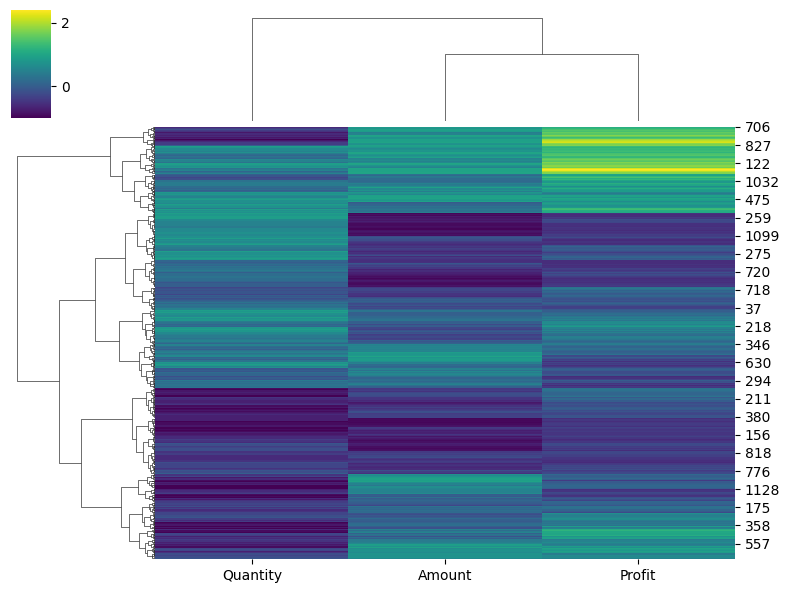

In [21]:
sns.clustermap(
    X_num,
    row_linkage=Z,
    col_cluster=True,
    cmap="viridis",
    figsize=(8, 6),
    xticklabels=num_features
)


# 6. DBSCAN (NUMERIC + FREQUENCY ENCODED)

In [18]:
# Tambahkan frequency encoding (dipakai DBSCAN)
for col in ["City","Sub-Category"]:
    freq = df[col].value_counts(normalize=True)
    df[f"{col}_freq"] = df[col].map(freq)

X_db = RobustScaler().fit_transform(df[["Amount","Profit","Quantity",
                                        "City_freq","Sub-Category_freq"]])

# DBSCAN model
dbscan = DBSCAN(eps=0.8, min_samples=5)
db_labels = dbscan.fit_predict(X_db)

unique_labels = set(db_labels)
n_clusters_db = len(unique_labels) - (1 if -1 in unique_labels else 0)

print("\nLabel DBSCAN:", unique_labels)
print("Jumlah cluster DBSCAN (excluding noise):", n_clusters_db)

# Silhouette score untuk DBSCAN (jika valid)
if n_clusters_db >= 2:
    sil_db = silhouette_score(X_db, db_labels)
    print("Silhouette Score - DBSCAN:", sil_db)
else:
    print("Silhouette Score - DBSCAN: Tidak valid (cluster < 2)")




Label DBSCAN: {np.int64(0), np.int64(-1)}
Jumlah cluster DBSCAN (excluding noise): 1
Silhouette Score - DBSCAN: Tidak valid (cluster < 2)


### # 7. RINGKASAN PERBANDINGAN

In [19]:
print("\n===================== HASIL PERBANDINGAN =====================")
print("Hierarchical (k=3)  → Silhouette:", sil_hier)
print("DBSCAN              → Cluster Valid:", n_clusters_db >= 2)
print("DBSCAN labels       →", unique_labels)
print("===============================================================\n")



===================== HASIL PERBANDINGAN =====================
Hierarchical (k=3)  → Silhouette: 0.2997322723702026
DBSCAN              → Cluster Valid: False
DBSCAN labels       → {np.int64(0), np.int64(-1)}

